# **Titanic Dataset**: Linear vs Polynomial Regression
### **Author**: Muhammad Usman
### **Date**: 20 July, 2025
Description: This notebook performs linear and polynomial regression on the Titanic dataset, analyzing the relationship between passenger age and fare. It includes:
- Handle Missing Values
- Outlier Detection and Removal
- Scaling Features
- Modeling
- Performance Evaluation
-------------------------------------
# 1. Import Libraries
# --------------------


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# warnings
import warnings
warnings.filterwarnings('ignore')

# ------------------------------
# 2. Load Dataset
# ------------------------------

In [3]:
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# ------------------------------
# 3. Handle Missing Values
# ------------------------------

In [4]:
# Check missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# Fill missing values (age col. with mean)
df['age'].fillna(df['age'].mean(), inplace = True)
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# -------------------------------------------
# 4. Outlier Detection and Removal
# -------------------------------------------

# Histograms

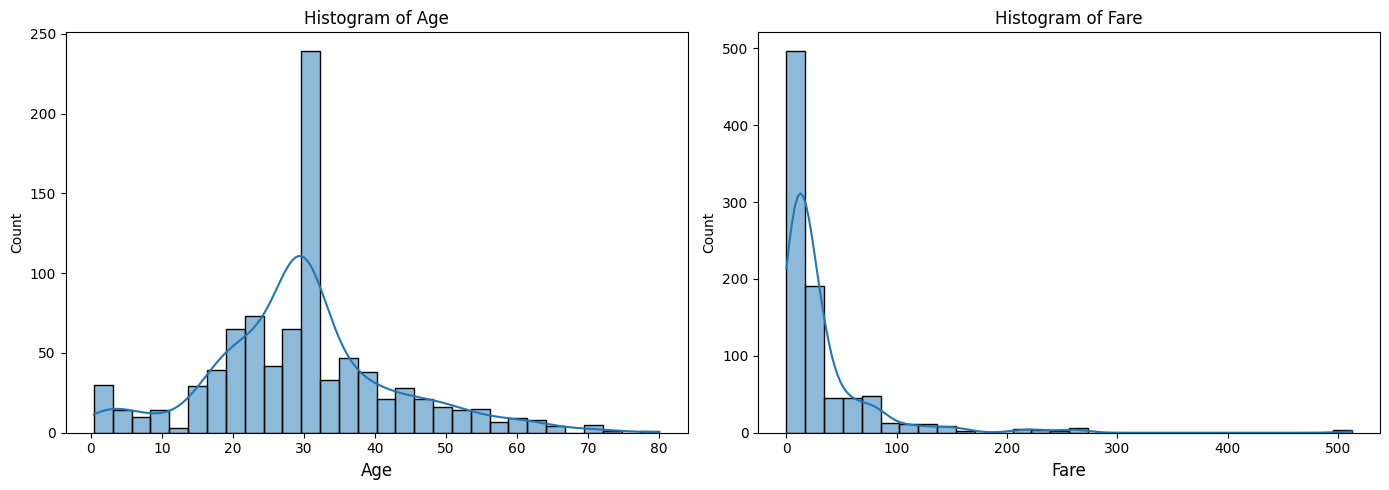

In [6]:
# Check data normality by histogram
fig, axes = plt.subplots(1,2, figsize = (14, 5))

# For age
sns.histplot(data = df, x = 'age', bins = 30, ax = axes[0], kde = True, edgecolor = 'black')
axes[0].set_title('Histogram of Age')
axes[0].set_xlabel('Age', fontsize = 12)

# for fare
sns.histplot(data = df, x = 'fare', bins = 30, ax = axes[1], kde = True)
axes[1].set_title('Histogram of Fare')
axes[1].set_xlabel('Fare', fontsize = 12)

plt.tight_layout()
plt.show()

# Age: this indicate age is roughly skewed (normallay distributed), so standscaler is better 
# Fare: this indicate data is positively (right) skewed (mean > median)
# Most people paid low fares; a few paid very high fares(Mean > Median (big gap))
# MinMax is better
# For ML model, data should be on same scale for better results.

# Boxplots

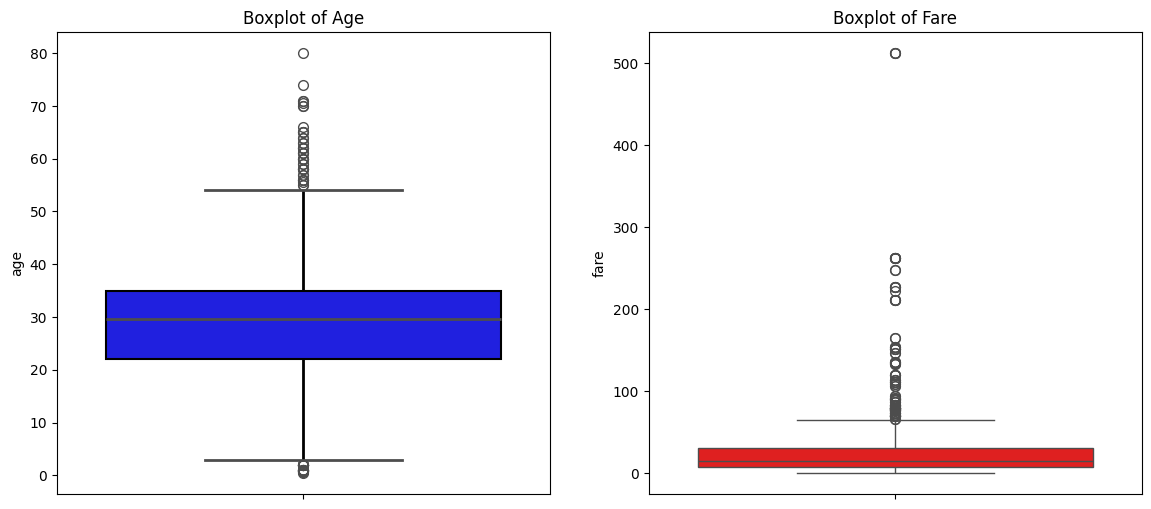

In [7]:
# Visualize Outliers by using boxplt
figure, axes = plt.subplots(1,2, figsize = (14, 6))

sns.boxplot(data = df, y = 'age', ax = axes[0], color = 'blue', fliersize = 7,
            linewidth = 2, boxprops = dict(linewidth = 1.5, edgecolor = 'black'),
            whiskerprops = dict(linewidth =2, color = 'black'))
axes[0].set_title('Boxplot of Age')

sns.boxplot(data = df, y = 'fare', ax = axes[1], color= 'red', fliersize = 7)
axes[1].set_title('Boxplot of Fare')

plt.show()

# IQR Method (unscaled data) 

In [ ]:
# Remove outliers by using IQR Method

for column in ['age', 'fare']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    df = df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]
    
# reset indices (number of rows changed)
df.reset_index(drop = True, inplace = True)


# Z-Score: Normally distributed data
# IQR: Skewed/non-normal data
# 🔹 For Age:
# Z-Score or IQR both can work, but IQR is safer especially if distribution isn't perfectly normal.

# 🔹 For Fare:
# Definitely use IQR — it’s highly skewed and Z-score is not reliable for that.

# Post-outlier removal boxplots

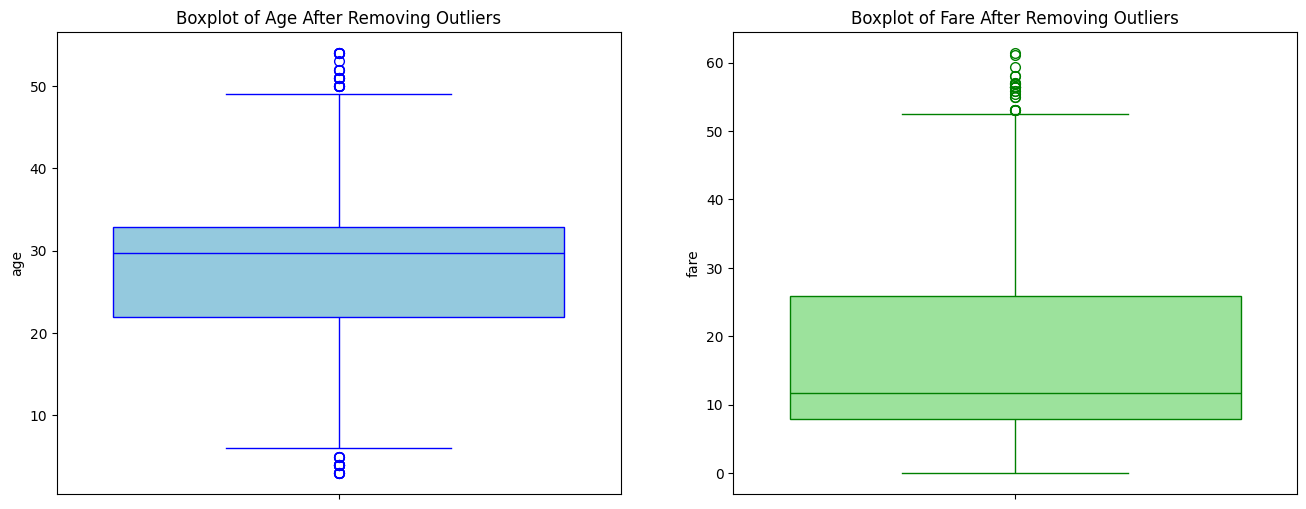

In [9]:
# Visualize After Removing Outliers by using boxplt
figure, axes = plt.subplots(1,2, figsize = (16, 6))

sns.boxplot(data = df, y = 'age', ax = axes[0], color = 'skyblue', fliersize = 7, linecolor = 'blue')
axes[0].set_title('Boxplot of Age After Removing Outliers')

sns.boxplot(data = df, y = 'fare', ax = axes[1], color= 'lightgreen', fliersize = 7, linecolor = 'green')
axes[1].set_title('Boxplot of Fare After Removing Outliers')

plt.show()

# ------------------------------
# **5. Linear Regression**
# ------------------------------

In [10]:
# Define features and target
X = df[['age']]
y = df[['fare']]

# Split Data into Training and Testing Sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Scaling

In [12]:
# Apply StandartScaler only to the features
x_scaler = StandardScaler()
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

## Fit Linear Regression Model

In [13]:
# Fit linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

## Predict on Scaled data

In [14]:
# prediction
y_pred_scaled = model.predict(X_test_scaled)

## Evaluate Linear Regression Model

In [15]:
# Evaluate Model
print("Model Coefficient (slope):", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

# Inverse transform y_test and y_pred for real-world evaluation
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test_original = y_scaler.inverse_transform(y_test_scaled)

# Evaluate model performance
mse_linear = mean_squared_error(y_test_original, y_pred)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y_test_original, y_pred)
r2_linear = r2_score(y_test_original, y_pred)

print(" \n Linear Regression Model Performance Metrics: ")
print(f"Mean Squared Error (MSE): {mse_linear: .2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear: .2f}")
print(f"Mean Absolute Error (MAE): {mae_linear: .2f}")
print(f"R-squared (R2): {r2_linear: .2f}")

# 🔍 Interpretation with Scaled Data:
# If age increases by 1 standard deviation, the predicted fare increases by ~0.0294 standard deviations.
# The small slope (0.029) suggests that age has a very weak effect on fare.
# ⚠️ Intercept Note:  
# The intercept (-0.3023) just means: when age is at its mean (0 after scaling), 
# the predicted fare is -0.3023 standard deviations from the mean fare.

Model Coefficient (slope): 0.08422987818626732
Intercept: 9.511466612234698e-18
 
 Linear Regression Model Performance Metrics: 
Mean Squared Error (MSE):  176.10
Root Mean Squared Error (RMSE):  13.27
Mean Absolute Error (MAE):  10.31
R-squared (R2):  0.01


## Visualize Predictions vs Actual

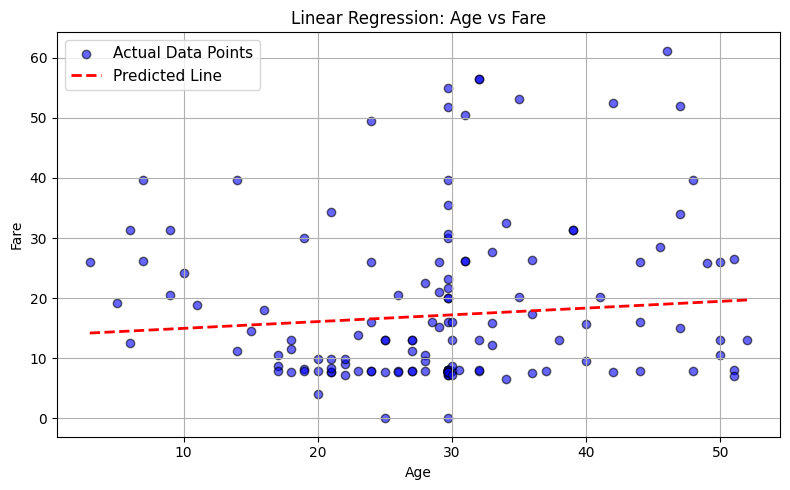

In [16]:
# Sort values for a smooth regression line
sorted_idx = X_test.squeeze().argsort()  # convert to Series if needed
X_sorted = X_test.iloc[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

# Plot  
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', edgecolors='k', alpha=0.6, label='Actual Data Points')  # y_test_original assumed to be y_test
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, linestyle='--', label='Predicted Line')

plt.title('Linear Regression: Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(frameon=True, fontsize=11)
plt.grid(True)
plt.tight_layout()
plt.show()


# -----------------------------------
# **2. Polynomial Regression**
# -----------------------------------

In [17]:
# Define features and target
X = df[['age']]
y = df['fare']

# Split data into training and testing sets (before scaling and transforming)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler (fit on training data only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PolynomialFeatures (degree 2)
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit Polynomial Regression Model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict on test data
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate model performance
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(" \n Polynomial Regression Model Performance Metrics:\n")
print(f"Mean Squared Error (MSE): {mse_poly: .2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly: .2f}")
print(f"Mean Absolute Error (MAE): {mae_poly: .2f}")
print(f"R-squared (R2): {r2_poly: .2f}")



 
 Polynomial Regression Model Performance Metrics:

Mean Squared Error (MSE):  171.76
Root Mean Squared Error (RMSE):  13.11
Mean Absolute Error (MAE):  9.70
R-squared (R2):  0.03


# Visualize Polynomial Regression

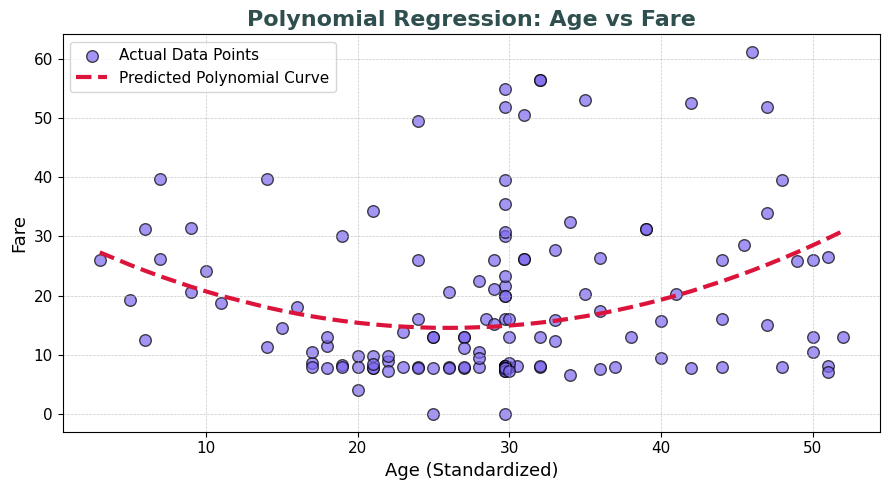

In [18]:
# Sort the test data for smooth polynomial curve
sorted_idx = X_test.squeeze().argsort()  # .squeeze() if X_test is DataFrame with one column
X_sorted = X_test.iloc[sorted_idx]
y_pred_sorted = y_pred_poly[sorted_idx]

# Plot
plt.figure(figsize=(9, 5))

# Scatter plot (actual data)
plt.scatter(
    X_test, y_test,
    color='mediumslateblue',
    edgecolors='black',
    alpha=0.7,
    s=70,
    label='Actual Data Points'
)

# Polynomial regression curve (predicted)
plt.plot(
    X_sorted, y_pred_sorted,
    color='crimson',
    linestyle='--',
    linewidth=3,
    label='Predicted Polynomial Curve'
)

# Titles and labels with styling
plt.title('Polynomial Regression: Age vs Fare', fontsize=16, fontweight='bold', color='darkslategray')
plt.xlabel('Age (Standardized)', fontsize=13)
plt.ylabel('Fare', fontsize=13)

# Grid and legend
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(frameon=True, fontsize=11)

# Ticks styling
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Tight layout for clean spacing
plt.tight_layout()

# Show the final plot
plt.show()


# --------------------------------------------------
# **6. Compare Model Performance**
# --------------------------------------------------

In [19]:
# R² Score improvement
r2_improvement = r2_poly - r2_linear

# MSE improvement
mse_diff = mse_linear - mse_poly
mse_percent = (mse_diff / mse_linear) * 100

# RMSE improvement
rmse_diff = rmse_linear - rmse_poly
rmse_percent = (rmse_diff / rmse_linear) * 100

# MAE improvement
mae_diff = mae_linear - mae_poly
mae_percent = (mae_diff / mae_linear) * 100

# Display comparison
print("📈 Model Performance Comparison (Polynomial vs Linear Regression)\n")
print(f"✅ R-squared (R²) Improvement: {r2_improvement:.4f}")
print(f"✅ Mean Squared Error (MSE) Reduced By: {mse_diff:.4f} ({mse_percent:.2f}%)")
print(f"✅ Root Mean Squared Error (RMSE) Reduced By: {rmse_diff:.4f} ({rmse_percent:.2f}%)")
print(f"✅ Mean Absolute Error (MAE) Reduced By: {mae_diff:.4f} ({mae_percent:.2f}%)")


📈 Model Performance Comparison (Polynomial vs Linear Regression)

✅ R-squared (R²) Improvement: 0.0244
✅ Mean Squared Error (MSE) Reduced By: 4.3377 (2.46%)
✅ Root Mean Squared Error (RMSE) Reduced By: 0.1645 (1.24%)
✅ Mean Absolute Error (MAE) Reduced By: 0.6039 (5.86%)
